# Analyzing IMDB Data in Keras

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])
print(len(x_train[0]))


[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

And we'll also one-hot encode the output.

In [5]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [51]:
# TODO: Build the model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1000,)))
model.add(Dropout(.8))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))



# TODO: Compile the model using a loss function and an optimizer.
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                32832     
__________

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [52]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
#earlystopping 
callback=[keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0009, patience=2, verbose=0, mode='auto')]

model_history=model.fit(x_train, y_train, epochs=100, batch_size=500, verbose=2,callbacks=callback)

Epoch 1/100
5s - loss: 0.6735 - acc: 0.5906
Epoch 2/100
4s - loss: 0.4764 - acc: 0.7770
Epoch 3/100
3s - loss: 0.4048 - acc: 0.8203
Epoch 4/100
3s - loss: 0.3655 - acc: 0.8427
Epoch 5/100
3s - loss: 0.3435 - acc: 0.8544
Epoch 6/100
4s - loss: 0.3245 - acc: 0.8647
Epoch 7/100
4s - loss: 0.3103 - acc: 0.8717
Epoch 8/100
4s - loss: 0.2969 - acc: 0.8778
Epoch 9/100
4s - loss: 0.2830 - acc: 0.8852
Epoch 10/100
4s - loss: 0.2716 - acc: 0.8911
Epoch 11/100
4s - loss: 0.2561 - acc: 0.8986
Epoch 12/100
4s - loss: 0.2439 - acc: 0.9074
Epoch 13/100
4s - loss: 0.2355 - acc: 0.9101
Epoch 14/100
4s - loss: 0.2228 - acc: 0.9142
Epoch 15/100
4s - loss: 0.2074 - acc: 0.9208
Epoch 16/100
4s - loss: 0.1979 - acc: 0.9274
Epoch 17/100
5s - loss: 0.1873 - acc: 0.9290
Epoch 18/100
5s - loss: 0.1811 - acc: 0.9348
Epoch 19/100
5s - loss: 0.1690 - acc: 0.9402
Epoch 20/100
6s - loss: 0.1594 - acc: 0.9418
Epoch 21/100
6s - loss: 0.1489 - acc: 0.9461
Epoch 22/100
4s - loss: 0.1406 - acc: 0.9491
Epoch 23/100
4s - l

dict_keys(['loss', 'acc'])
[0.59063999474048612, 0.77700000166893002, 0.82027999758720394, 0.84271999478340154, 0.85436000108718868, 0.86471999764442442, 0.87171999931335453, 0.87776000022888179, 0.8851600062847137, 0.89112000107765199, 0.89855999946594234, 0.90743999958038335, 0.91008000016212465, 0.9141600024700165, 0.92080000281333918, 0.92744000077247624, 0.92899999499320984, 0.93476000070571896, 0.94019999504089358, 0.94183999538421626, 0.9461199939250946, 0.94907999753952021, 0.95231999635696407, 0.95259999513626104, 0.95607999920845033, 0.95767999529838566, 0.96071999549865728, 0.96059999823570252, 0.96407999515533449, 0.96579999804496763, 0.96503999471664426, 0.96755999922752378, 0.96695999622344975, 0.96659999966621402, 0.96976000308990473, 0.97119999647140498, 0.96959999918937678, 0.97144000172615053]


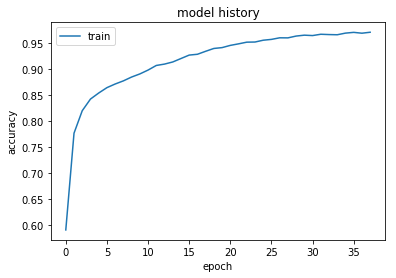

In [53]:
import matplotlib.pyplot as plt
print(model_history.history.keys())
print(model_history.history['acc'])
plt.plot(model_history.history['acc'])
plt.title('model history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[0.6734880423545837, 0.47642646729946136, 0.40478579223155975, 0.36550244033336637, 0.34353696584701537, 0.32450129568576813, 0.31026820838451385, 0.29692989289760591, 0.28295704960823059, 0.27163003712892531, 0.25606870979070662, 0.24387924432754515, 0.23549867928028106, 0.22282927036285399, 0.20736836642026901, 0.19789537966251372, 0.18731029450893402, 0.18111276805400847, 0.16903644949197769, 0.15944962665438653, 0.14891218662261962, 0.14055831104516983, 0.14187671214342118, 0.13295870855450631, 0.12794241115450858, 0.12303596183657646, 0.10905954875051975, 0.11263527631759644, 0.10894669771194458, 0.10231695145368576, 0.10209544867277145, 0.098605860769748685, 0.096924569159746177, 0.099507588893175125, 0.088065948933362961, 0.090926843062043183, 0.089435690939426424, 0.087278772294521328]


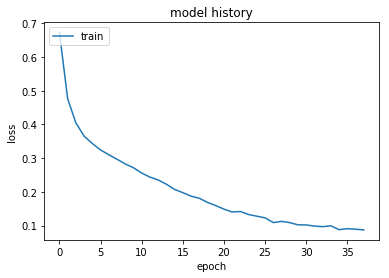

In [54]:

print(model_history.history['loss'])
plt.plot(model_history.history['loss'])
plt.title('model history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [55]:
score = model.evaluate(x_test, y_test, verbose=1)
print("\nAccuracy: ", score[1])

24800/25000 [============================>.] - ETA: 0s  

In [ ]:
Accuracy:  0.85876